### ETL Cycle
I will be extracting data from multiple sources of file formats, transforming it into particular data types, and loading it into a single source for analysis.
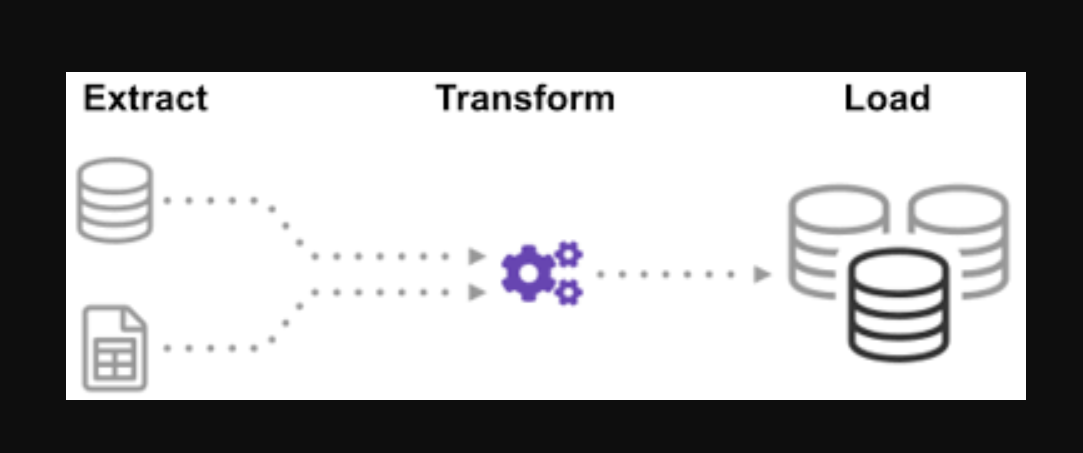
The files dealership_data contain CSV, JSON, and XML files for used car data which contain features named car_model, year_of_manufacture, price, and fuel. So we are going to extract the file from the raw data and transform it into a target file and load it in the output.

In [1]:
!pip install wget

You should consider upgrading via the 'C:\Users\pc\anaconda3\envs\brainiac\python.exe -m pip install --upgrade pip' command.


In [2]:
import urllib.request as r
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0221EN-SkillsNetwork/labs/module%206/Lab%20-%20Extract%20Transform%20Load/data/datasource.zip'
file_name = 'data.zip'
r.urlretrieve(url,file_name)

('data.zip', <http.client.HTTPMessage at 0x1f40ae88100>)

In [3]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is D85B-11FE

 Directory of C:\Users\pc\Downloads\ETL

09/01/2022  12:19 PM    <DIR>          .
09/01/2022  11:41 AM    <DIR>          ..
09/01/2022  11:41 AM    <DIR>          .ipynb_checkpoints
09/01/2022  11:56 AM    <DIR>          data
09/01/2022  12:33 PM             4,249 data.zip
09/01/2022  12:19 PM           121,366 Untitled.ipynb
               2 File(s)        125,615 bytes
               4 Dir(s)  182,502,014,976 bytes free


In [4]:
import zipfile
with zipfile.ZipFile(file_name,'r') as zip_ref:
    zip_ref.extractall('data/raw')

In [5]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is D85B-11FE

 Directory of C:\Users\pc\Downloads\ETL

09/01/2022  12:19 PM    <DIR>          .
09/01/2022  11:41 AM    <DIR>          ..
09/01/2022  11:41 AM    <DIR>          .ipynb_checkpoints
09/01/2022  12:33 PM    <DIR>          data
09/01/2022  12:33 PM             4,249 data.zip
09/01/2022  12:19 PM           121,366 Untitled.ipynb
               2 File(s)        125,615 bytes
               4 Dir(s)  182,501,986,304 bytes free


In [6]:
tmpfile    = "dealership_temp.tmp"               # store all extracted data

logfile    = "dealership_logfile.txt"            # all event logs will be stored

targetfile = "dealership_transformed_data.csv"   # transformed data is stored

### EXTRACT
The Function extract will extract large amounts of data from multiple sources in batches. By adding this function, it will now discover and load all the CSV file names, and the CSV files will be added to the date frame with each iteration of the loop, with the first iteration being attached first, followed by the second iteration, resulting in a list of extracted data.


In [22]:
import pandas as pd
#convering the csv to a dataframe
def extract_from_csv(file_to_process):
    df = pd.read_csv(file_to_process)
    return df

In [8]:
#converting JSON to a dataframe
def extract_from_json(file_to_process):
    df = pd.read_json(file_to_process,lines=True)
    return df

In [26]:
import xml.etree.ElementTree as ET
def extract_from_xml(file_to_extract):
    df = pd.DataFrame(columns = ['car_model','year_of_manufacture','price','fuel'])
    tree = ET.parse(file_to_extract)
    root = tree.getroot()
    for person in root:
        car_model = person.find("car_model").text
        year_of_manufacture = int(person.find("year_of_manufacture").text)
        price = float(person.find("price").text) 
        fuel = person.find("fuel").text
        df = df.append({"car_model":car_model,"year_of_manufacture":year_of_manufacture, "price":price, "fuel":fuel},ignore_index=True)
        return df

In [10]:
#Extraction Function
def extract():
    extracted_data = pd.DataFrame(columns=['car_model','year_of_manufacture','price', 'fuel']) 
    #for csv files
    for csvfile in glob.glob("data/*.csv"):
        extracted_data = extracted_data.append(extract_from_csv(csvfile), ignore_index=True)
    #for json files
    for jsonfile in glob.glob("data/*.json"):
        extracted_data = extracted_data.append(extract_from_json(jsonfile), ignore_index=True)
    #for xml files
    for xmlfile in glob.glob("data/*.xml"):
        extracted_data = extracted_data.append(extract_from_xml(xmlfile), ignore_index=True)
    return extracted_data

### Transform
 “Transform” phase of the process. This function will convert the column height, which is in inches, to millimeters and the column pounds, which is in pounds, to kilogram, and return the results in the variable data. In the input data frame, the column height is in feet. Convert the column to convert it to meters and round it to two decimal places.

In [11]:
def transform(data): 
    data['price'] = round(data.price, 2)
    return data

### Loading
It’s time to load the data into the target file now that we’ve gathered and specified it. We save the pandas data frame as a CSV in this scenario. We’ve now gone through the steps of extracting, transforming, and loading data from various sources into a single target file. We need to establish a logging entry before we can finish our work. We’ll achieve this by writing a logging function.

In [12]:
def load(targetfile,data_to_load):
    data_to_load.to_csv(targetfile)

In [13]:
#log function
def log(message):
    '''
    All the data are written will be appended to the current information when the “a” is added. We can then attach a timestamp to each phase of the process, indicating when it starts and when it finishes, by generating this type of entry. After we’ve defined all the code required to perform the ETL process on the data, the last step is to call all the functions.
    '''
    timestamp_format = '%H:%M:%S-%h-%d-%Y'
    #Hour-Minute-Second-MonthName-Day-Year
    now = datetime.now() # get current timestamp
    timestamp = now.strftime(timestamp_format)
    with open("dealership_logfile.txt","a") as f: f.write(timestamp + ',' + message + 'n')


### ETL PROCESS


In [18]:
from datetime import datetime
log("ETL Job Started")

In [27]:
import glob
log("Extract phase Started")
extracted_data = extract() 
log("Extract phase Ended")

In [31]:
log("Transform phase Started")

transformed_data = transform(extracted_data)

In [32]:
log("Transform phase Ended")

In [34]:
log("Load phase Started")
load(targetfile,transformed_data)
log("Load phase Ended")

In [35]:
log("Transform phase Ended")